In [2]:
import librosa
import IPython.display as ipd 
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Amplitude')

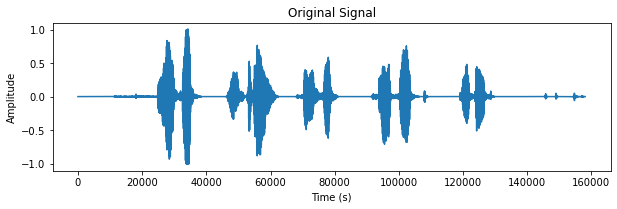

In [3]:
y,sr = librosa.load('Lab_3_Aneesh.wav')
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# A1.Use librosa.effects.trim()to remove the silence parts of speech from beginning and end of your recorded signal.Listen to the new signal and perceptually compare the audio with original.


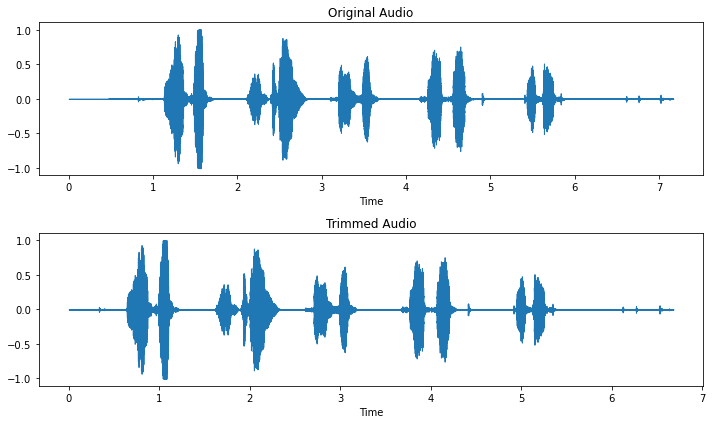

In [4]:
trimmed_y, index = librosa.effects.trim(y)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')

plt.subplot(2, 1, 2)
librosa.display.waveshow(trimmed_y, sr=sr)
plt.title('Trimmed Audio')

plt.tight_layout()
plt.show()

# A2. Use librosa.effects.split()to splitthe recorded speech with detected silences.Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.

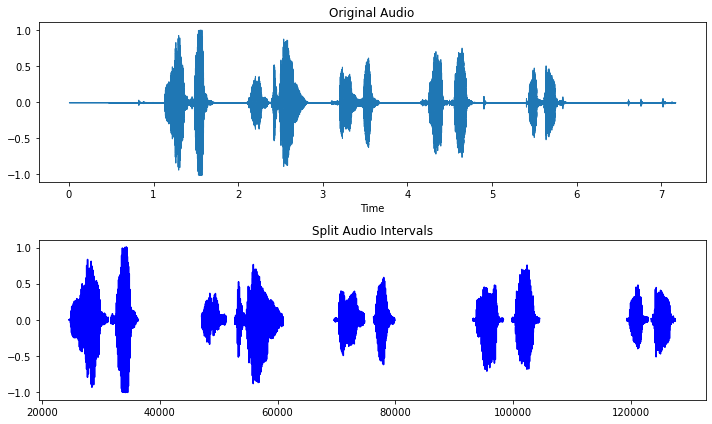

In [6]:
import soundfile as sf

top_db = 20

intervals = librosa.effects.split(y, top_db=top_db)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')

plt.subplot(2, 1, 2)

for interval in intervals:
    start, end = interval
    plt.plot(range(start, end), y[start:end], color='blue')

plt.title('Split Audio Intervals')

plt.tight_layout()
plt.show()

# Save and listen to each split interval
for i, interval in enumerate(intervals):
    start, end = interval
    split_audio = y[start:end]
    split_audio_path = f"splitaudio_{i+1}.wav"
    sf.write(split_audio_path, split_audio, sr)


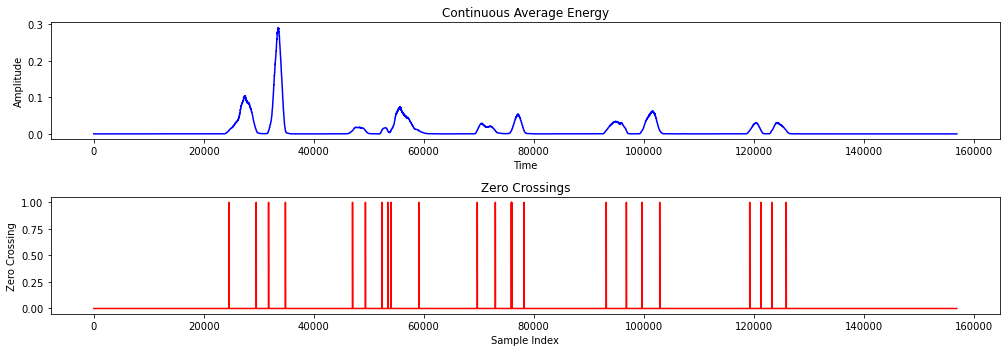

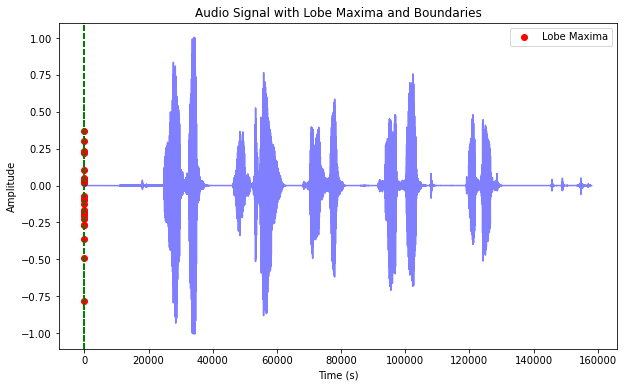

In [7]:
import numpy as np
import statistics
import matplotlib.pyplot as plt

def calculate_continuous_average_energy(y, N):
    """Calculate continuous average energy."""
    Ek = []
    for k in range(len(y) - N + 1):
        sum_energy = sum([y[i] * y[i] for i in range(k, N + k)])
        Ek.append((1 / N) * sum_energy)
    return np.array(Ek)

def normalize_energy(Ek_arr):
    """Normalize energy using mean and variance."""
    mean = statistics.mean(Ek_arr)
    var = statistics.variance(Ek_arr)
    Em = [(Ek_arr[i] - mean) / var for i in range(len(Ek_arr))]
    return np.array(Em)

def plot_energy_and_zero_crossings(Ek_arr, zero_crossings):
    """Plot continuous average energy and zero crossings."""
    plt.figure(figsize=(14, 5))
    plt.subplot(2, 1, 1)
    plt.plot(Ek_arr, color='blue')
    plt.title('Continuous Average Energy')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Plot the zero crossings
    plt.subplot(2, 1, 2)
    plt.plot(zero_crossings, color='r')
    plt.title('Zero Crossings')
    plt.xlabel('Sample Index')
    plt.ylabel('Zero Crossing')
    plt.tight_layout()
    plt.show()

def detect_lobe_maxima(Em_arr):
    """Detect lobe maxima and boundaries."""
    zero_crossings_Energy = np.where(np.diff(np.sign(Em_arr)))[0]
    lobe_maxima_indices = []
    lobe_boundaries = []

    for i in range(len(zero_crossings_Energy) - 1):
        lobe_start = zero_crossings_Energy[i]
        lobe_end = zero_crossings_Energy[i + 1]

        lobe_max_index = lobe_start + np.argmax(Em_arr[lobe_start:lobe_end])
        lobe_maxima_indices.append(lobe_max_index)
        lobe_boundaries.append((lobe_start, lobe_end))

    return lobe_maxima_indices, lobe_boundaries

def plot_with_lobe_maxima(y, sr, lobe_maxima_indices, lobe_boundaries):
    """Plot audio signal with lobe maxima and boundaries."""
    plt.figure(figsize=(10, 6))
    plt.plot(y, alpha=0.5, color='blue')

    lobe_maxima_times = librosa.samples_to_time(lobe_maxima_indices, sr=sr)
    lobe_boundaries_times = librosa.samples_to_time(np.array(lobe_boundaries).flatten(), sr=sr)

    plt.scatter(lobe_maxima_times, y[lobe_maxima_indices], color='r', label='Lobe Maxima')

    for start, end in zip(lobe_boundaries_times[::2], lobe_boundaries_times[1::2]):
        plt.axvline(x=start, color='g', linestyle='--', alpha=0.5)
        plt.axvline(x=end, color='g', linestyle='--', alpha=0.5)

    plt.title('Audio Signal with Lobe Maxima and Boundaries')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
N = 1102
Ek_arr = calculate_continuous_average_energy(y, N)

    # Normalize energy
Em_arr = normalize_energy(Ek_arr)

    # Plot energy and zero crossings
zero_crossings = librosa.zero_crossings(Em_arr, pad=False)
plot_energy_and_zero_crossings(Ek_arr, zero_crossings)

    # Detect lobe maxima and boundaries
lobe_maxima_indices, lobe_boundaries = detect_lobe_maxima(Em_arr)

    # Plot audio signal with lobe maxima and boundaries
plot_with_lobe_maxima(y, sr, lobe_maxima_indices, lobe_boundaries)